# Library and Dataset Import 

In [11]:
# libraries
import pandas as pd
import time_series_analysis

In [ ]:
def read_dataset():
    '''
    Combines all of the file data and lists the amount of citations per day in order
    :return: DataFrame of our dataset
    '''

    read_list_rev = ['parking_citations_2012_part1_datasd.csv', 'parking_citations_2012_part2_datasd.csv',
                'parking_citations_2013_part1_datasd.csv', 'parking_citations_2013_part2_datasd.csv',
                'parking_citations_2014_part1_datasd.csv', 'parking_citations_2014_part2_datasd.csv',
                'parking_citations_2015_part1_datasd.csv', 'parking_citations_2015_part2_datasd.csv',
                'parking_citations_2016_part1_datasd.csv', 'parking_citations_2016_part2_datasd.csv',
                'parking_citations_2017_part1_datasd.csv', 'parking_citations_2017_part2_datasd.csv',
                'parking_citations_2018_part1_datasd.csv', 'parking_citations_2018_part2_datasd.csv',
                ]
    read_list_norm = ['parking_citations_2019_part1_datasd.csv', 'parking_citations_2019_part2_datasd.csv',
                'parking_citations_2020_part1_datasd.csv', 'parking_citations_2020_part2_datasd.csv',
                'parking_citations_2021_part1_datasd.csv', 'parking_citations_2021_part2_datasd.csv',
                'parking_citations_2022_part1_datasd.csv', 'parking_citations_2022_part2_datasd.csv',
                'parking_citations_2023_part1_datasd.csv', 'parking_citations_2023_part2_datasd.csv'
                ]
    
    con_list = []
    for f in read_list_rev:
        df = pd.read_csv('./Datasets/Parking Ticket Databases' + f) # make sure to change this to the correct python read path
        df = df.reindex(index=df.index[::-1])
        con_list.append(df)
    for f in read_list_norm:
        df = pd.read_csv('./Datasets/Parking Ticket Databases' + f) # make sure to change this to the correct python read path
        con_list.append(df)
    
    output_df = pd.concat(con_list)
    return output_df

In [12]:
df = read_dataset()

# Time Series Analysis

## Existing Parking Meters and Parking Ticket Frequency Changes Scatter Graph

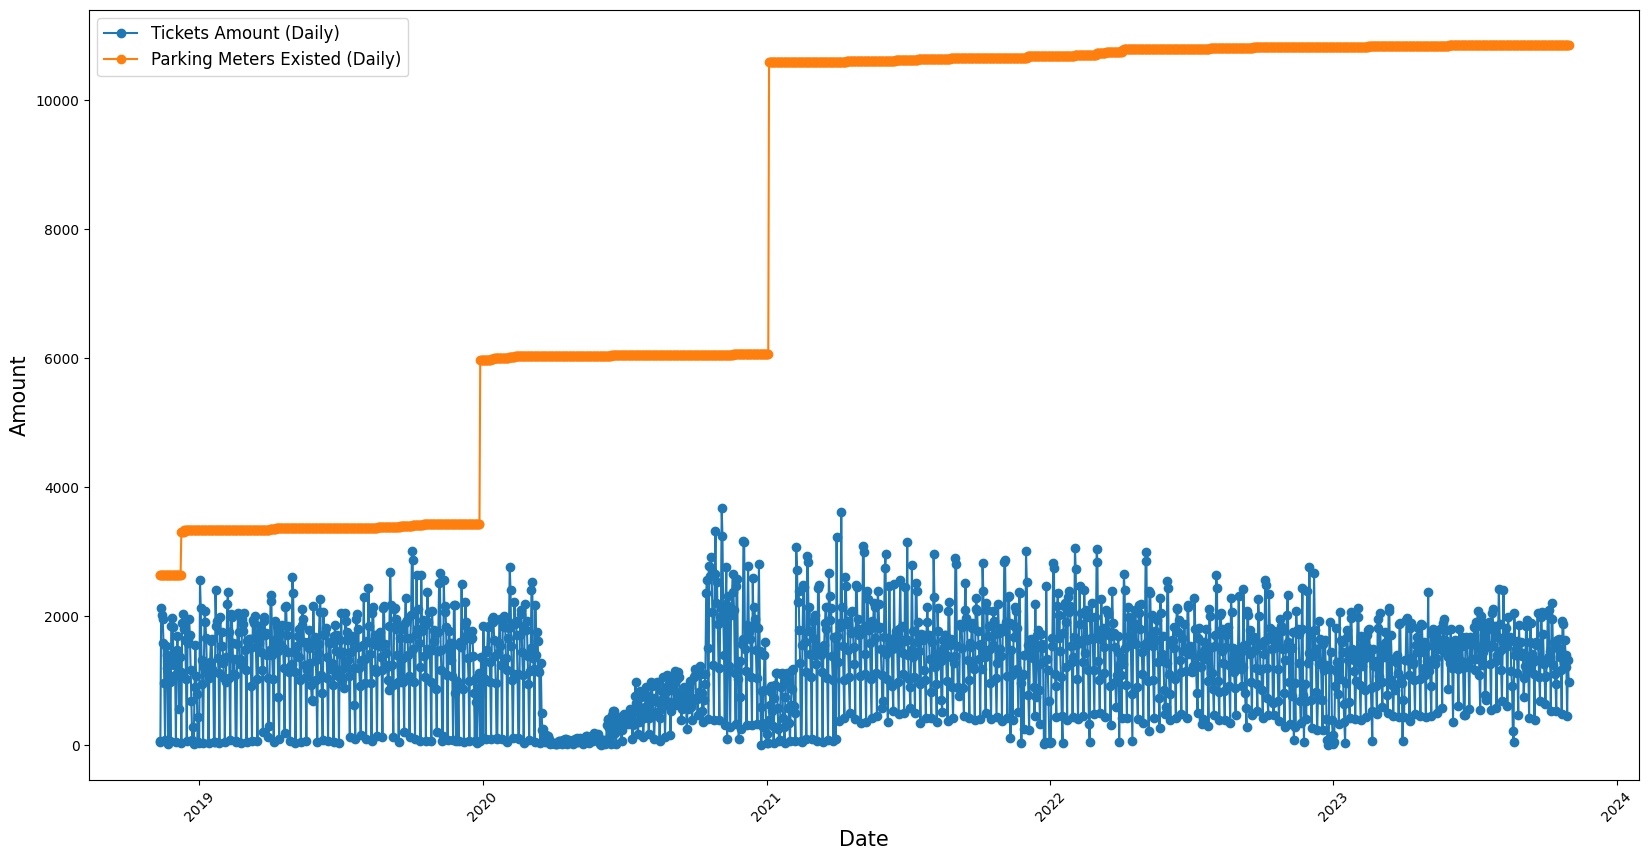

In [3]:
time_series_analysis.parking_meters_scatter_plot(df)

## Population Regression Analysis

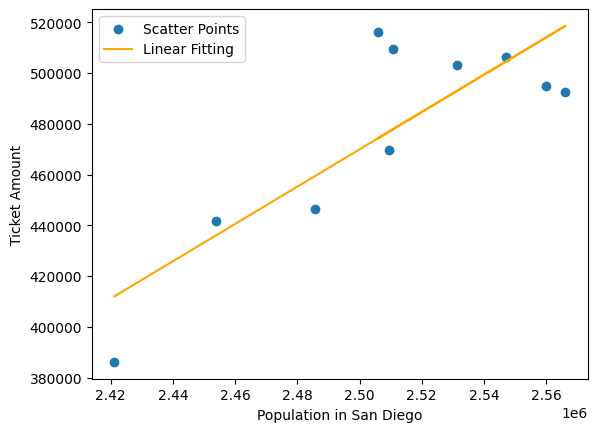

P-Value: [0.01538938 0.00325623]


In [4]:
print("P-Value:", time_series_analysis.population_correlation(df, include_2020=False, visualization=True))

## Parking Meters Regression Analysis

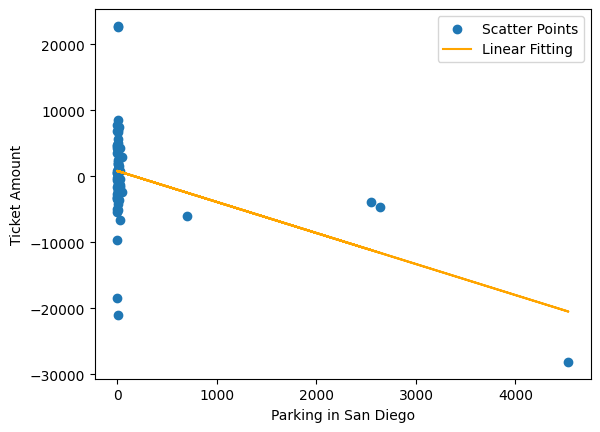

P-Value: [3.84905780e-01 3.26577233e-04]


In [5]:
print("P-Value:", time_series_analysis.parking_meters_correlation(df, visualization = True))

## Heatmap for Time Series

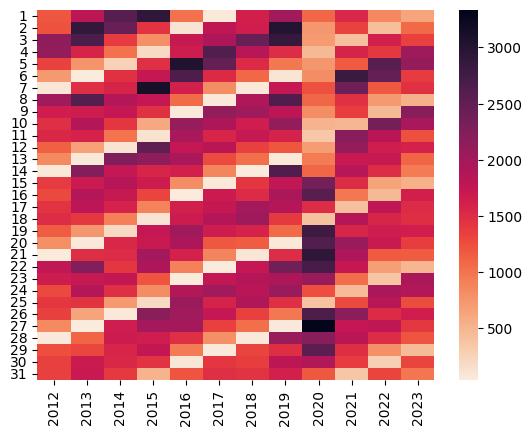

In [6]:
# October
time_series_analysis.time_heatmap_monthly(df, month = 10)

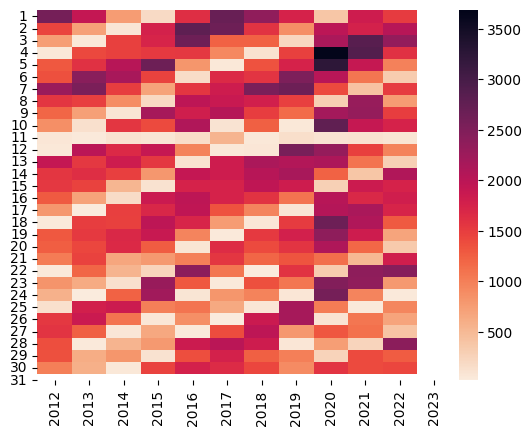

In [7]:
# November
time_series_analysis.time_heatmap_monthly(df, month = 11)

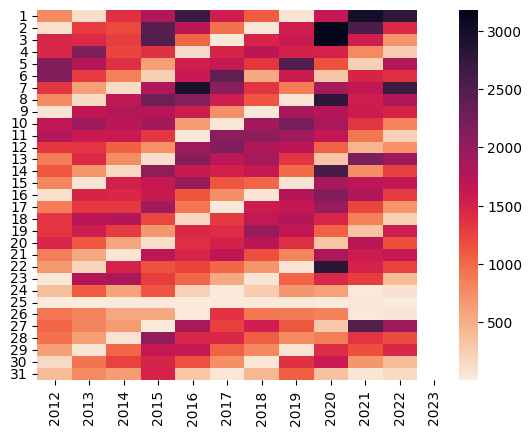

In [8]:
# December
time_series_analysis.time_heatmap_monthly(df,month = 12)

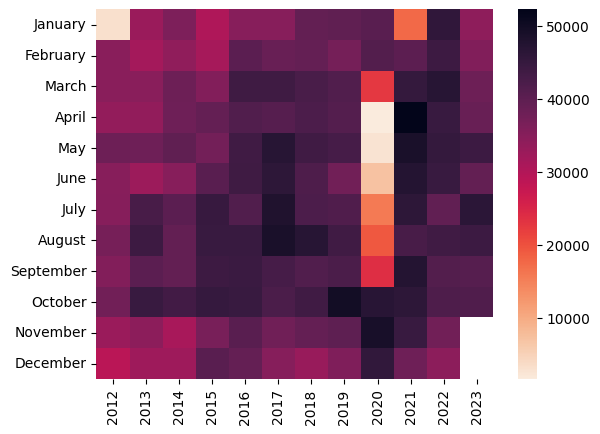

In [9]:
# Yearly
time_series_analysis.time_heatmap_yearly(df)

## Seasonal Decompose

14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] done processing
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of Dat

Seasonal Decomposition Result              ds         yhat   yhat_lower   yhat_upper        trend  \
0    2012-01-01 -1140.414819 -1594.884671  -640.164375  1050.898992   
1    2012-01-02  -109.101977  -576.024956   339.773365  1051.188137   
2    2012-01-03  1150.200087   743.086439  1628.078469  1051.477282   
3    2012-01-04  1236.864775   769.917722  1698.863444  1051.766427   
4    2012-01-05  1290.200030   830.256156  1799.348188  1052.055572   
...         ...          ...          ...          ...          ...   
4682 2024-10-26   948.124951   461.054602  1420.451000  1174.228292   
4683 2024-10-27   293.966251  -208.215864   755.763691  1173.927150   
4684 2024-10-28  1656.932048  1173.560973  2130.009472  1173.626009   
4685 2024-10-29  1713.977999  1234.080767  2188.637684  1173.324867   
4686 2024-10-30  1783.196400  1327.184115  2279.329252  1173.023725   

         holidays       weekly      yearly  lockdowns  
0     -852.663435 -1089.062617   88.549851        0.0  
1    

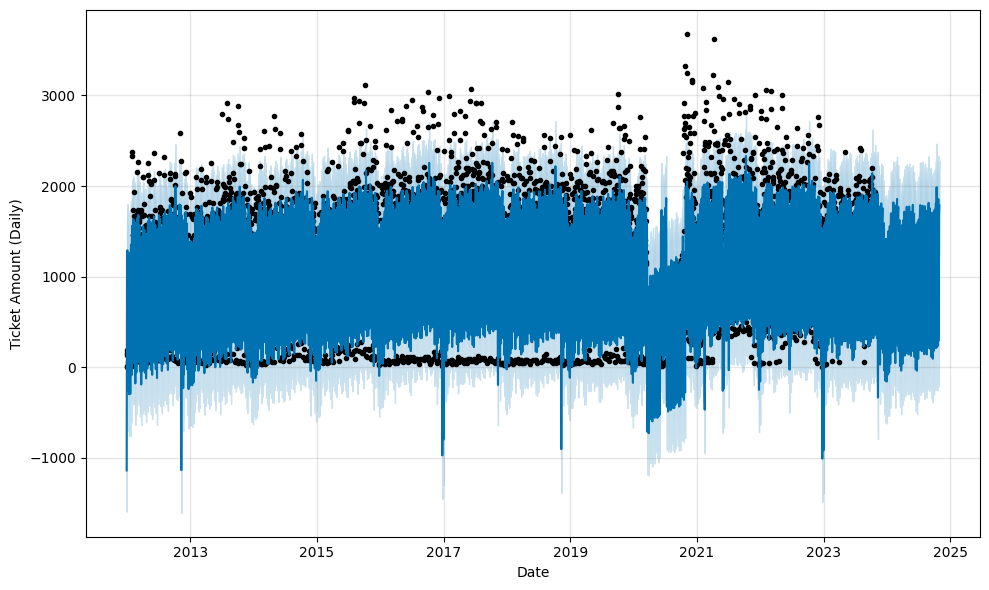

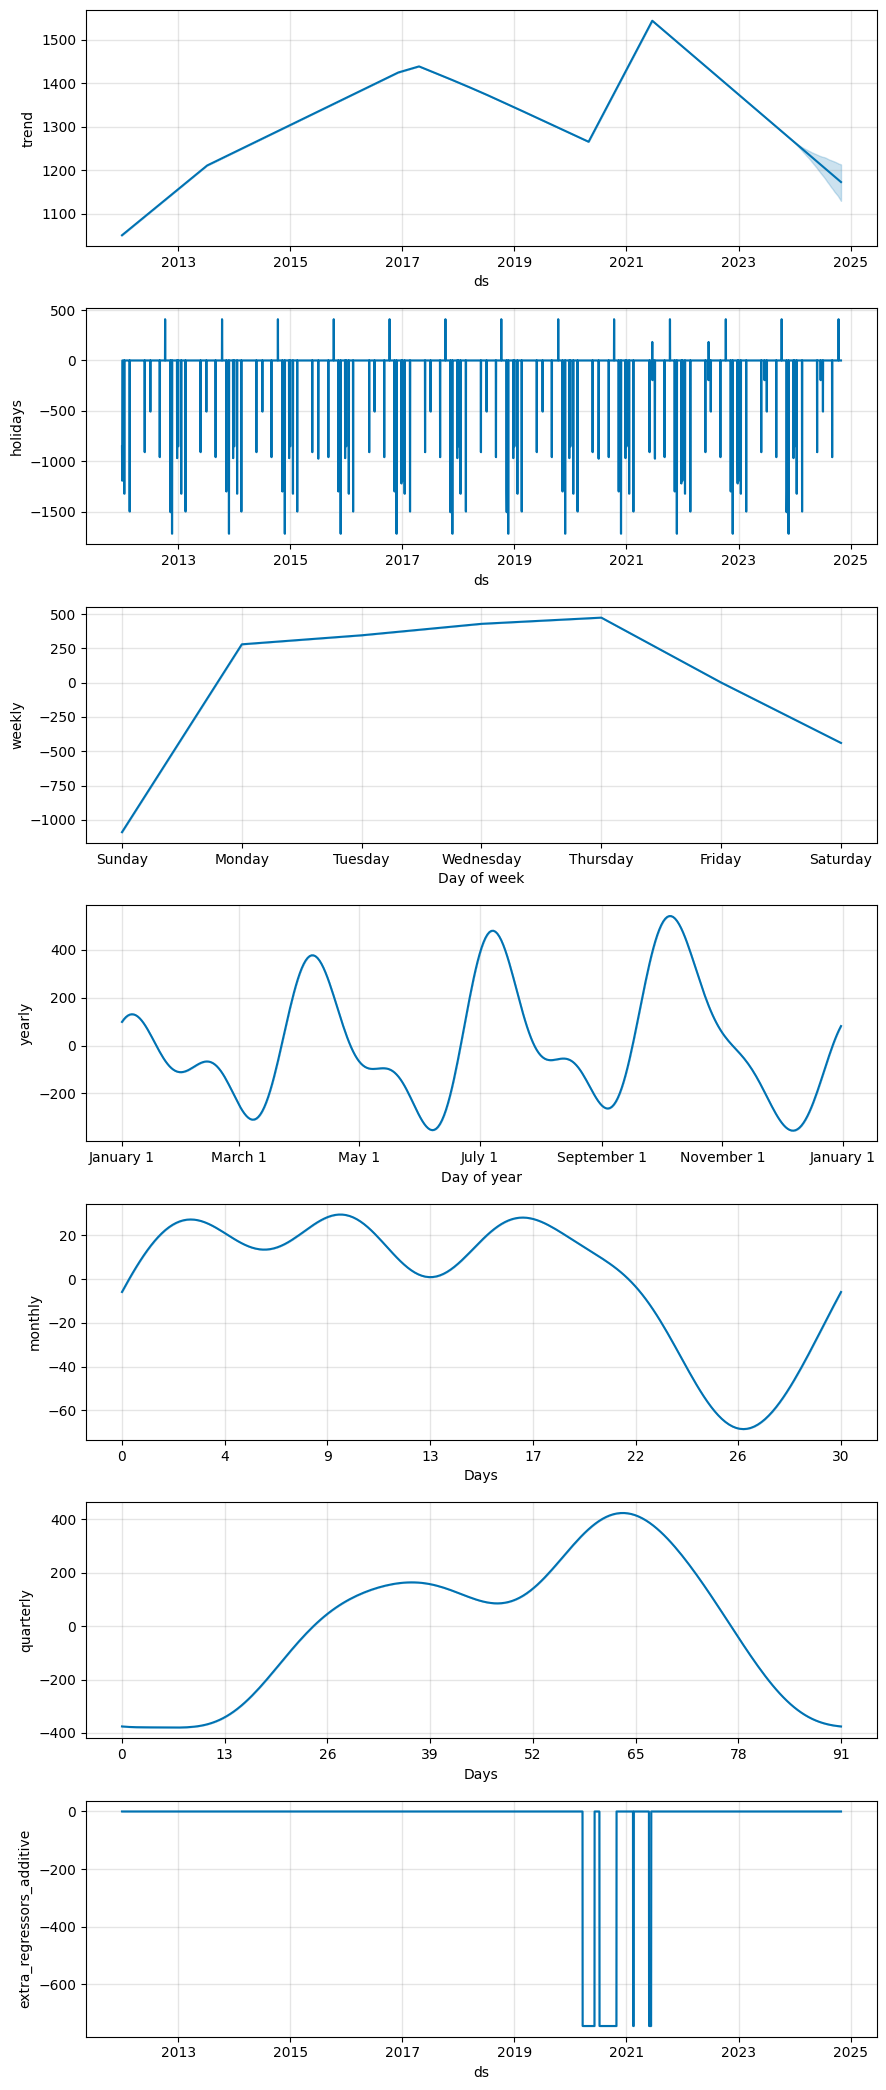

In [10]:
print("Seasonal Decomposition Result", time_series_analysis.seasonal_decompose(df, visualization=True))